# Graph Non Isomorphism Interactive Proof

The following is an interactive proof for graph isomorphism. 
It is a way that a prover with superior computational resources can convince the 
verifier that a pair of known graphs are non isomorphic. 
In particular, the protocol works as follow
1. The verifier selects one of the graphs, and randomly permutes it, sends it to the prover
2. The uses its resources to figure out what graph the verifier permuted, and send its answer to the verifier
3. If the verifier agrees with the prover answer, it accepts, else it rejects


First of all, we fix a random seed, and some sizes for the graphs in question (we use regular graphs as they are pleasant to see and hard to distinguish for isomorphisms)

In [11]:
# Parameters for the interactive simulation
V = 10
D = 4
generate_isomorphic = False

def random_permute(G):
    perm = Permutations(G.vertices()).random_element()
    newG = G.relabel(perm, inplace=False)
    return (newG, perm)

def isomorphic_graphs(D, V):
    G_1 = graphs.RandomRegular(D, V)
    G_2, _ = random_permute(G_1)
    return G_1, G_2

def non_isomorphic_graphs(D, V):
    G_1 = G_2 = Graph()
    while G_1.is_isomorphic(G_2):
        G_1 = graphs.RandomRegular(D, V)
        G_2 = graphs.RandomRegular(D, V)
    return G_1, G_2


We generate two graph $G_1, G_2$, isomorphic or non isomorphic depending on if we would like to see a honest or cheating prover

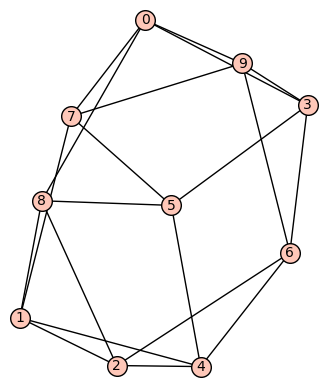

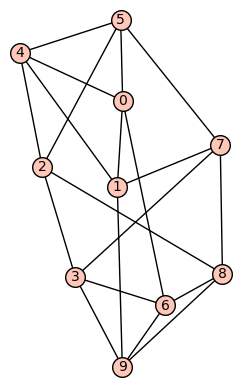

In [12]:
G_1, G_2 = isomorphic_graphs(D, V) if generate_isomorphic else non_isomorphic_graphs(D, V)

G_1.show()
G_2.show()

Now, we work onto the proof, here is the verifier first step, which consists in permuting one of the two graphs chosen at random, say $G_i$, resulting in the graph $G$

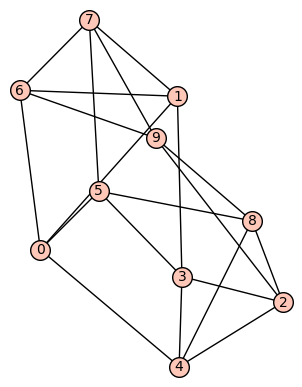

In [13]:
i = randint(1,2)
G, _ = random_permute(G_1 if i == 1 else G_2)
G.show()

Now, the prover given only $G$ needs to be able to figure out what of the two graphs it is isomorphic to.
Note that this is where the prover uses its superior computational ability, as figuring out isomorphism for general graphs has (as the time of writing) no efficient solution

In [14]:
j = 1 if G_1.is_isomorphic(G) else 2

Finally, the verifier check that $i = j$

In [15]:
i == j

True

# Repetition
Let us now encapsulate the above procedure, and repeat it to ensure that it is not possible to fool the verifier as much

In [16]:
def procedure(G_1, G_2):
    # Verifier step
    i = randint(1,2)
    G, pi = random_permute(G_1 if i == 1 else G_2)
    
    # Prover answer
    j = 1 if G_1.is_isomorphic(G) else 2
    
    # Verifier check
    return i == j

We will run two experiments, one generating some random isomorphic graphs (in which case we expect 50% of the cases to fail), and one running with two non isomorphic graphs

In [17]:
# Experiment Parameters
N = 2000
V = 10
D = 4


def experiment(D, V, graph_gen_fun, N, K):
    success_count = 0
    for i in range(0, N):
        G_1, G_2 = graph_gen_fun(D, V)
        # Repeat the experiment multiple times
        failure = False
        for j in range(0, K):
            if not procedure(G_1, G_2):
                failure = True
                break
        success_count += not failure
    return success_count / N

Here is the experiment in the case $G_1, G_2$ are not isomorphic, we expect the resulting probability to be 1, as the prover will always be able to distinguish the two

In [18]:
experiment(D, V, non_isomorphic_graphs, N, 1)

1

Here instead we run it with two isomorphic graphs, and we expect the success probability to hover around 1/2, as the prover cannot do better than guessing

In [19]:
experiment(D, V, isomorphic_graphs, N, 1)

497/1000

Finally, let us try to see what the trend is for success rate when $k$ increases. We expect to see an exponentially declining trend, as every trial as a probability of 1/2 of spuriosly succeeding, so the probability of $k$ trials succeeding should be $2^{-k}$. 
This guarantees that after a number of repetitions the verifier should be convinced with an extremely low probability of having been convinced. In fact repeating the experiment 10 times gives the verifier a probability of having been fooled less than one in a thousands

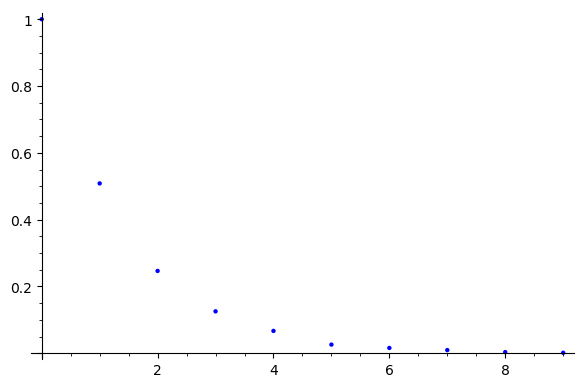

In [20]:
list_plot([experiment(D, V, isomorphic_graphs, N, k) for k in range(0, 10)])